<a href="https://colab.research.google.com/github/kmontero3/RedsHackathon/blob/main/RelieverToOpener_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
fangraphs = pd.read_csv('/content/drive/My Drive/RedsHackathon/fangraphs_season_level.csv')
savant = pd.read_csv('/content/drive/My Drive/RedsHackathon/savant_pitch_level.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Average values for each role:
      FStrike_pct   LOB_pct  LOB_Wins       ERA     K_pct    BB_pct   K_per_9  \
Role                                                                            
RP       0.610441  0.745454 -0.035513  3.412901  0.261044  0.089354  9.777412   
SP       0.631451  0.747852  0.169483  3.735251  0.237482  0.068244  8.824751   

      BB_per_9       AVG      WHIP  ...  ZSwing_pct_sc  OContact_pct_sc  \
Role                                ...                                   
RP    3.383181  0.219565  1.203992  ...       0.659790         0.529959   
SP    2.554204  0.237050  1.192271  ...       0.661884         0.565646   

      ZContact_pct_sc     botOvr     botStf     botCmd  Stuff_plus  \
Role                                                                 
RP           0.825048  55.009100  55.600894  51.731323  107.913521   
SP           0.850379  55.316094  49.743406  56.380310  100.535549   

      Location_plus  Pitching_plus      tERA  
Role            

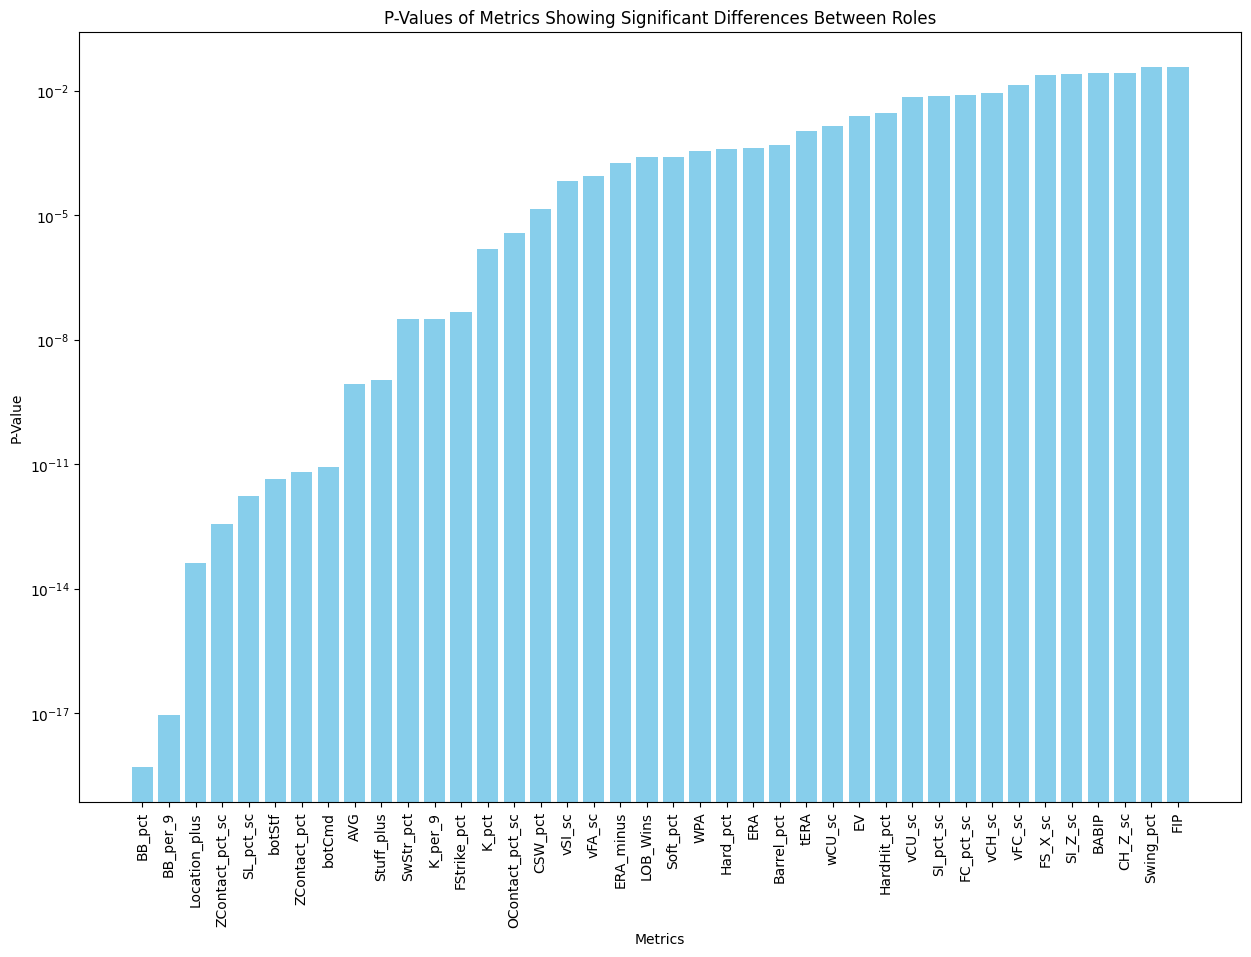

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics I want to test for significant difference
metrics = ['FStrike_pct', 'LOB_pct', 'LOB_Wins', 'ERA', 'K_pct', 'BB_pct', 'K_per_9', 'BB_per_9', 'AVG', 'WHIP', 'BABIP', 'FIP', 'xFIP', 'WPA', 'OSwing_pct', 'ZSwing_pct', 'Swing_pct', 'ZContact_pct', 'Zone_pct', 'SwStr_pct', 'CStr_pct', 'CSW_pct', 'ERA_minus', 'Soft_pct', 'Hard_pct', 'EV', 'LA', 'Barrel_pct', 'HardHit_pct', 'FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc', 'SL_pct_sc', 'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc', 'SC_pct_sc', 'KN_pct_sc', 'UN_pct_sc', 'vFA_sc', 'vFC_sc', 'vFS_sc', 'vFO_sc', 'vSI_sc', 'vSL_sc', 'vCU_sc', 'vKC_sc', 'vEP_sc', 'vCH_sc', 'vSC_sc', 'vKN_sc', 'FA_X_sc', 'FC_X_sc', 'FS_X_sc', 'FO_X_sc', 'SI_X_sc', 'SL_X_sc', 'CU_X_sc', 'KC_X_sc', 'EP_X_sc', 'CH_X_sc', 'SC_X_sc', 'KN_X_sc', 'FA_Z_sc', 'FC_Z_sc', 'FS_Z_sc', 'FO_Z_sc', 'SI_Z_sc', 'SL_Z_sc', 'CU_Z_sc', 'KC_Z_sc', 'EP_Z_sc', 'CH_Z_sc', 'SC_Z_sc', 'KN_Z_sc', 'wFA_sc', 'wFC_sc', 'wFS_sc', 'wFO_sc', 'wSI_sc', 'wSL_sc', 'wCU_sc', 'wKC_sc', 'wEP_sc', 'wCH_sc', 'wSC_sc', 'wKN_sc', 'OSwing_pct_sc', 'ZSwing_pct_sc', 'OContact_pct_sc', 'ZContact_pct_sc', 'botOvr', 'botStf', 'botCmd', 'Stuff_plus', 'Location_plus', 'Pitching_plus','tERA']

# Separate the DataFrame into SP and RP and filter for a "qualifying full season"
sp_fangraphs = fangraphs[(fangraphs['Role'] == 'SP') & (fangraphs['IP'] > 150)]
rp_fangraphs = fangraphs[(fangraphs['Role'] == 'RP') & (fangraphs['IP'] > 50)]

# Concatenate the two subsets
filtered_df = pd.concat([sp_fangraphs, rp_fangraphs])

# Group data by 'Role' and calculate mean for each Role
grouped_data = filtered_df.groupby('Role')[metrics].mean()

# Display the average values for each role
print("Average values for each role:")
print(grouped_data)

# Initialize an empty dictionary to hold metrics with significant differences
significant_metrics = {}

# Perform ANOVA test for each Role's Averages
for metric in metrics:
    # Prepare groups for ANOVA
    groups = [group[metric].dropna() for name, group in filtered_df.groupby('Role')]
    if len(groups) > 1:
        f_val, p_val = stats.f_oneway(*groups)
        if p_val < 0.05:  # Assuming 0.05 as the threshold for significance
            significant_metrics[metric] = p_val

# Sort metrics by p-value to rank by greatest significant difference
sorted_significant_metrics = sorted(significant_metrics.items(), key=lambda x: x[1])

# Display metrics with significant differences
print("\nMetrics with significant differences between roles, ranked by p-value:")
for metric, p_val in sorted_significant_metrics:
    print(f"{metric}: p-value = {p_val}")

# Sort metrics by p-value to rank by greatest significant difference
sorted_significant_metrics = sorted(significant_metrics.items(), key=lambda x: x[1])

# Display metrics with significant differences
print("\nMetrics with significant differences between roles, ranked by p-value:")
for metric, p_val in sorted_significant_metrics:
    print(f"{metric}: p-value = {p_val}")

# Extract metrics and their corresponding p-values for plotting
metrics, p_values = zip(*sorted_significant_metrics)

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(metrics, p_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('P-Value')
plt.title('P-Values of Metrics Showing Significant Differences Between Roles')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.yscale('log')  # Use logarithmic scale for better visibility of small p-values
plt.show()



In [26]:
#pitch type percentages
pitch_types = [
    'FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc',
    'SL_pct_sc', 'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc',
    'SC_pct_sc', 'KN_pct_sc', 'UN_pct_sc']

#pitch value attributes
attributes = ['wFA_sc', 'wFC_sc', 'wFS_sc', 'wFO_sc', 'wSI_sc', 'wSL_sc', 'wCU_sc', 'wKC_sc', 'wEP_sc', 'wCH_sc', 'wSC_sc', 'wKN_sc']

# Function to count how many pitch types are used at least 10 % of the time
def count_high_usage_pitch_types(row):
    return sum(row[pitch] >= 0.1 for pitch in pitch_types)

# Function to count the number of pitches with a Value/Runs above Average greater than 2 for a row
def count_attributes_above_two(row):
    return sum(row[attr] > 2 for attr in attributes)

# Function to check if any of the pitcher's throw a specific pitch more than 60% of the time
def has_pitch_type_above_six(row):
    return any(row[pitch] >= 0.6 for pitch in pitch_types)

# Apply functions to each row
fangraphs['high_usage_pitch_types'] = fangraphs.apply(count_high_usage_pitch_types, axis=1)
fangraphs['attributes_above_two'] = fangraphs.apply(count_attributes_above_two, axis=1)

# Filter relief pitchers based on if the pitchers have 3 or greater "high value pitches", if they have 3 pitch types with at least 10% usage,
# and if they've thrown at least 40 innings

filtered_rps = fangraphs[(fangraphs['Role'] == 'RP') &
                  (fangraphs['high_usage_pitch_types'] >= 3) &
                  (fangraphs['attributes_above_two'] >= 3) & (fangraphs['IP'] >= 40) &
                  ~fangraphs.apply(has_pitch_type_above_six, axis=1)]

# Selecting relevant columns
selected_columns = ['Name', 'MLBAMID', 'tERA', 'FIP', 'xFIP', 'Stuff_plus','BABIP','IP', 'Season', 'Role', 'ERA', 'botCmd', 'Location_plus', 'BB_pct']

# Filter by botCmd and sort by Location_Plus, Walk %
filtered_rps = filtered_rps[filtered_rps['Location_plus'] > 102]
rp_criteria_sorted = filtered_rps.sort_values(by=['Location_plus', 'botCmd'], ascending=[False, True])[selected_columns]

# Display the data of these players
print("\nRelief Pitchers meeting the specific criteria:")
rp_criteria_sorted



Relief Pitchers meeting the specific criteria:


,Name,MLBAMID,tERA,FIP,xFIP,Stuff_plus,BABIP,IP,Season,Role,ERA,botCmd,Location_plus,BB_pct
1160,Chris Martin,455119,3.749438,2.436858,2.896610,107.800416,0.300699,51.1,2023,RP,1.051949,73.375123,114.127878,0.0402
2039,Hoby Milner,571948,2.768876,3.130687,3.662312,74.355447,0.254335,64.1,2023,RP,1.818654,70.597796,109.063494,0.0516
1178,Shawn Armstrong,542888,2.784088,2.755040,4.089063,104.244771,0.238095,40.0,2023,RP,1.800000,60.241073,108.995098,0.0500
157,Andrew Kittredge,552640,2.507303,2.557785,3.004120,118.533595,0.277108,65.1,2021,RP,1.653062,64.999001,108.867189,0.0508
331,Raisel Iglesias,628452,3.133430,2.827173,2.296625,117.289303,0.287671,70.0,2021,RP,2.571429,68.600322,108.169532,0.0440
472,Tyler Wells,669330,3.840692,3.626171,4.111741,119.093834,0.226277,57.0,2021,RP,4.105263,64.589176,106.687892,0.0536
823,Raisel Iglesias,628452,2.803475,2.467268,2.994765,106.952426,0.280822,62.0,2022,RP,2.467742,60.398107,106.278145,0.0569
668,Rafael Montero,606160,2.502329,2.644137,3.221599,112.976444,0.260355,68.1,2022,RP,2.370733,62.111703,106.192484,0.0852
448,Jonathan LoÃ¡isiga,642528,2.351861,2.575691,3.147335,123.706094,0.276042,70.2,2021,RP,2.165093,60.728423,105.970268,0.0565
58,Craig Stammen,489334,3.391095,3.817333,3.294934,94.477598,0.247664,80.1,2021,RP,2.800831,58.920326,105.574020,0.0314


In [27]:
pitcher_stats = savant[['pitcher','pitch_type','stand','woba_value','on_3b','on_2b','on_1b','inning','outs_when_up','events', 'role_key']]

#clean data
pitcher_stats = pitcher_stats.dropna(subset=['woba_value', 'events'])

# Calculate average wOBA
avg_woba = pitcher_stats.pivot_table(index='pitcher', columns='stand', values='woba_value', aggfunc=np.mean, fill_value=0)
avg_woba['woba_diff'] = abs(avg_woba['L'] - avg_woba['R'])
avg_woba_sorted = avg_woba.sort_values(by='woba_diff', key=abs, ascending=False).reset_index()

In [28]:
merged_df = pd.merge(rp_criteria_sorted, avg_woba_sorted, left_on='MLBAMID', right_on='pitcher', how='inner')
merged_df_sorted = merged_df.sort_values(by='woba_diff', key=abs, ascending=False).reset_index()
merged_df_sorted

,index,Name,MLBAMID,tERA,FIP,xFIP,Stuff_plus,BABIP,IP,Season,Role,ERA,botCmd,Location_plus,BB_pct,pitcher,L,R,woba_diff
0,15,Tyler Holton,663947,3.594652,3.551483,3.752134,89.344416,0.212670,84.1,2023,RP,2.134388,58.409534,103.009306,0.0530,663947,0.166917,0.290830,0.123912
1,1,Hoby Milner,571948,2.768876,3.130687,3.662312,74.355447,0.254335,64.1,2023,RP,1.818654,70.597796,109.063494,0.0516,571948,0.250778,0.346730,0.095952
2,11,Ryan Brasier,518489,3.356955,3.137722,4.035840,106.076598,0.248408,59.2,2023,RP,3.016758,57.041698,105.282914,0.0798,518489,0.362624,0.275431,0.087193
3,14,Gabe Speier,642100,3.337721,3.346503,2.710173,103.546632,0.305344,54.2,2023,RP,3.786590,62.754714,103.964508,0.0509,642100,0.240476,0.322443,0.081967
4,10,Brett Martin,656685,3.814455,3.539014,3.911496,96.336681,0.305419,62.1,2021,RP,3.176472,58.886034,105.491594,0.0530,656685,0.267964,0.337993,0.070029
5,6,Tyler Wells,669330,3.840692,3.626171,4.111741,119.093834,0.226277,57.0,2021,RP,4.105263,64.589176,106.687892,0.0536,669330,0.253187,0.320965,0.067778
6,2,Shawn Armstrong,542888,2.784088,2.755040,4.089063,104.244771,0.238095,40.0,2023,RP,1.800000,60.241073,108.995098,0.0500,542888,0.351984,0.290722,0.061262
7,8,Jonathan LoÃ¡isiga,642528,2.351861,2.575691,3.147335,123.706094,0.276042,70.2,2021,RP,2.165093,60.728423,105.970268,0.0565,642528,0.296759,0.259496,0.037264
8,4,Raisel Iglesias,628452,3.133430,2.827173,2.296625,117.289303,0.287671,70.0,2021,RP,2.571429,68.600322,108.169532,0.0440,628452,0.289655,0.259273,0.030382
9,5,Raisel Iglesias,628452,2.803475,2.467268,2.994765,106.952426,0.280822,62.0,2022,RP,2.467742,60.398107,106.278145,0.0569,628452,0.289655,0.259273,0.030382
